In [7]:
%matplotlib inline
%load_ext autoreload
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import time
from datetime import datetime
import scipy.optimize as opt
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
plt.style.use("ggplot")
mpl.pyplot.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams["font.size"] = 13
#mpl.rcParams["font.family"] = 'Osaka'

import sys
sys.path.append('../code/')

from hash import *
from plot_path import *
from simulation_additional import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# import data
path = '../data/BTCdata_presim.csv'
df = pd.read_csv(path)
df['time'] = pd.to_datetime(df['time'])
df = df.rename(columns={'blocktime': 'block_times', 'price': 'prices', 'probability of success /Eh': 'winning_rates'})
#df.tail()

df_exprvs = pd.read_csv('/Volumes/Data/research/BDA/simulation/sim_exprvs.csv')
df_price = pd.read_csv('/Volumes/Data/research/BDA/simulation/sim_prices_ps=0.csv')

dir_sim='/Volumes/Data/research/BDA/simulation/'
df_opt_w = pd.read_csv(dir_sim + 'opt_w.csv', index_col=0)

In [3]:
no_iter = 3

prices = df_price.loc[:, 'iter_{}'.format(no_iter)]
exprvs = df_exprvs.loc[:,'iter_{}'.format(no_iter)]

# sim_DAA_1 = simulation(prev_data=df)
# sim_DAA_1.sim_DAA_1(prices=prices, exprvs=exprvs, df_opt_w=df_opt_w)

# mpl.pyplot.rcParams['figure.figsize'] = (10.0, 4.0)
# x = sim_DAA_1.block_times.cumsum()
# fig = plt.figure()
# ax1 = fig.add_subplot(1,2,1)
# ax1.plot(x, sim_DAA_1.winning_rates)
# ax1.set_title('Winning rate')
# ax1.set_ylim(0.00002, 0.0001)
# #ax1.tick_params(direction = "inout", length = 5)
# ax1.set_xticks(np.array([0,50000,100000]))
# ax2 = fig.add_subplot(1,2,2)
# ax2.plot(x, sim_DAA_1.prices)
# ax2.set_title('Price')
# plt.show()

In [9]:
sim_DAA_1 = simulation(prev_data=df)
sim_DAA_1.sim_DAA_1(prices=prices, exprvs=exprvs, df_opt_w=df_opt_w)
sim_DAA_2 = simulation(prev_data=df)
sim_DAA_2.sim_DAA_2(prices=prices, exprvs=exprvs, df_opt_w=df_opt_w)
sim_DAA_asert = simulation(prev_data=df)
sim_DAA_asert.sim_DAA_asert(prices=prices, exprvs=exprvs, df_opt_w=df_opt_w)

In [10]:
# the number of blocks created in the simulations
print(sim_DAA_1.block_times.shape[0], sim_DAA_2.block_times.shape[0], sim_DAA_asert.block_times.shape[0])

7703 12048 12006


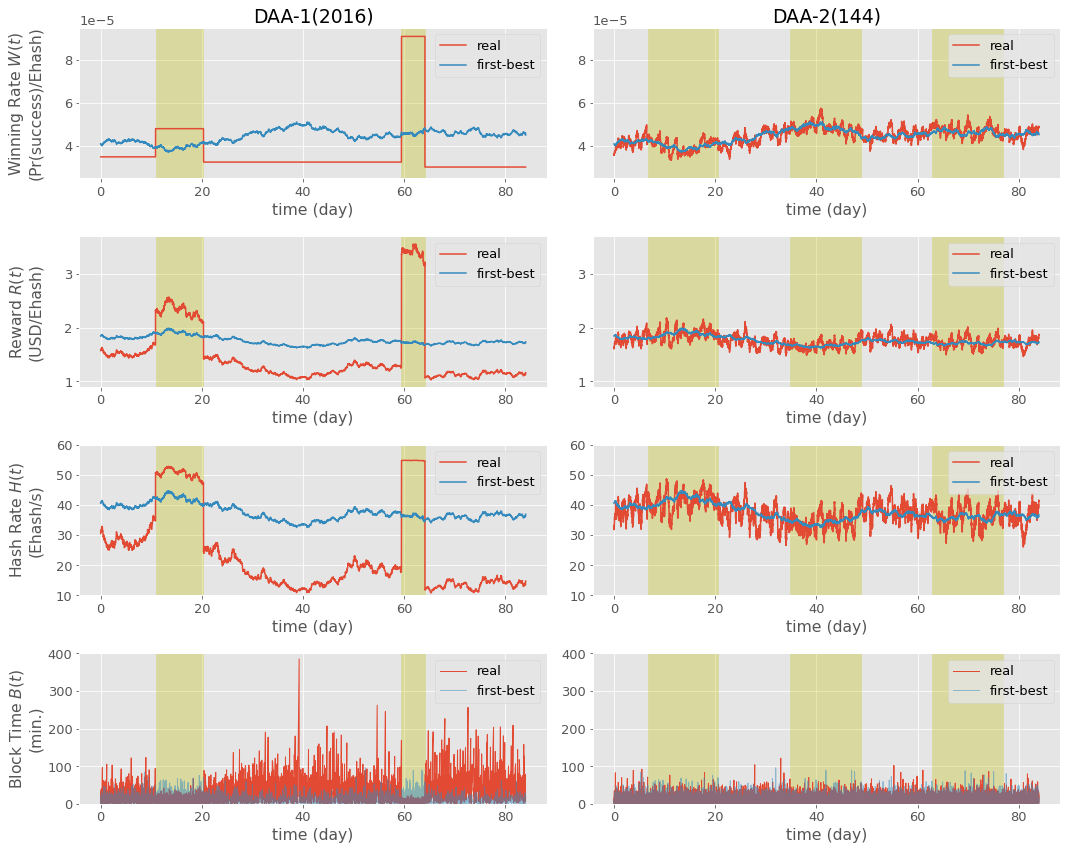

In [8]:
%autoreload
import warnings
warnings.filterwarnings('ignore')
mpl.pyplot.rcParams['figure.figsize'] = (15.0, 12.0)

sim_list = [sim_DAA_1, sim_DAA_2]
title_list = ['DAA-1(2016)', 'DAA-2(144)']
plot_paths_2(exprvs=exprvs, sim_list=sim_list, title_list=title_list)

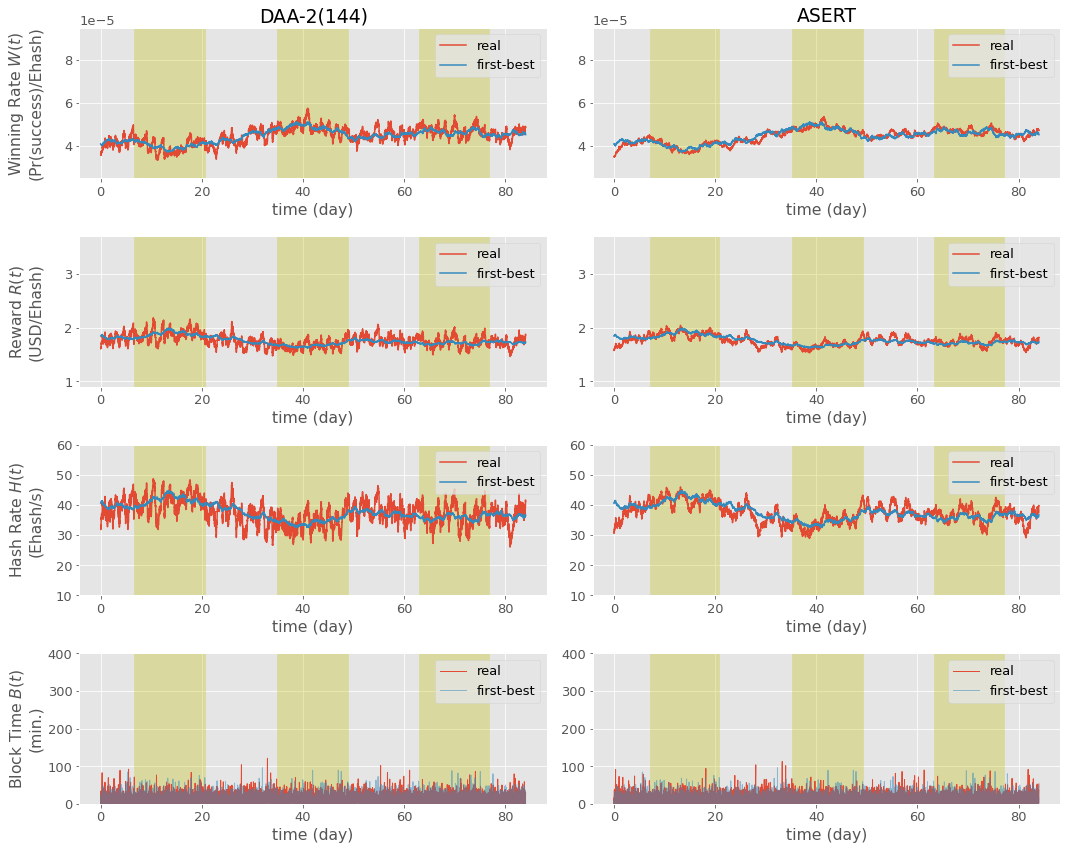

In [11]:
sim_list = [sim_DAA_2, sim_DAA_asert]
title_list = ['DAA-2(144)', 'ASERT']
plot_paths_2(exprvs=exprvs, sim_list=sim_list, title_list=title_list)